In [275]:
import pandas as pd
import json
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt

df = pd.read_csv("./results/matmul2d_1.0.csv")
pd.options.display.max_rows = 999
df.drop(["k", "n", "grid_size"], inplace=True, axis=1)
df

,conf,m,use_trace,in0_sharded,out_sharded,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,inference_time_avg,trace_time,offloading_time_in0,offloading_time_in1,TFLOPs (avg),Utilization (vs user grid),Utilization (vs 8x8 full grid)
0,f16_m2,256,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,257.33,0.0,8198.98,6401.78,0.13,0.10%,0.07%
1,f16_m2,512,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,244.19,0.0,31430.72,28049.47,1.10,0.84%,0.61%
2,f16_m2,1024,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,243.73,0.0,96463.44,94807.15,8.81,6.72%,4.89%
3,f16_m2,2048,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,399.80,0.0,397473.81,377968.07,42.97,32.78%,23.84%
4,f16_m2,3072,False,False,False,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,1990.74,0.0,855528.12,844532.97,29.13,22.22%,16.16%
5,f16_m2,4096,False,False,False,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,4383.52,0.0,1518186.57,1515043.02,31.35,23.92%,17.40%
6,f16_m2,8192,False,False,False,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,29435.45,0.0,6102711.92,6249188.66,37.35,28.50%,20.73%
7,f16_m4,256,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,243.64,0.0,6968.26,6255.39,0.14,0.21%,0.15%
8,f16_m4,512,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,244.95,0.0,25451.90,24265.53,1.10,1.67%,1.22%
9,f16_m4,1024,False,True,True,L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,248.80,0.0,95667.84,93970.06,8.63,13.17%,9.58%


In [405]:
import torch
import time
cpu_calc = list() 
n_exec = 100
for shape in df['m'].unique():
    in0 = torch.ones((shape, shape)).bfloat16()
    in1 = torch.randn((shape, shape)).bfloat16()
    start = time.time()
    for _ in range(n_exec):
        torch.matmul(in0, in1)
    tot_time = (time.time() - start) * 1e6
    tot_time /= n_exec
    cpu_calc.append(tot_time)
cpu_calc

KeyboardInterrupt: 

In [ ]:
import json 
with open("./results/torch_baseline.json", "w") as f:
    json.dump(cpu_calc, f)    

In [298]:
# Give name to configurations
confs = list(df['conf'].values)
unq_m = df['m'].unique()
n_confs = int(df.shape[0] / len(unq_m))
"""
confs = list()
for i in range(n_confs):
    for _ in unq_m:
        confs.append(f"conf_{i}")

df['conf'] = confs
"""

'\nconfs = list()\nfor i in range(n_confs):\n    for _ in unq_m:\n        confs.append(f"conf_{i}")\n\ndf[\'conf\'] = confs\n'

In [299]:
conf_infos = dict()
infs = ['use_trace', 'in0_sharded', 'out_sharded', 'in0_storage_type',
       'in1_storage_type', 'out_storage_type', 'dtype', 'math_fidelity',]
for conf in confs:
    conf_infos[conf] = dict()
    val0 = df.loc[df['conf'] == conf]
    for inf in infs:
        conf_infos[conf][inf] = val0[inf].values[0]
conf_infos

{'f16_m2': {'use_trace': False,
  'in0_sharded': True,
  'out_sharded': True,
  'in0_storage_type': 'L1',
  'in1_storage_type': 'DRAM',
  'out_storage_type': 'L1',
  'dtype': 'DataType.BFLOAT16',
  'math_fidelity': 'MathFidelity.HiFi2'},
 'f16_m4': {'use_trace': False,
  'in0_sharded': True,
  'out_sharded': True,
  'in0_storage_type': 'L1',
  'in1_storage_type': 'DRAM',
  'out_storage_type': 'L1',
  'dtype': 'DataType.BFLOAT16',
  'math_fidelity': 'MathFidelity.HiFi4'},
 'f8b_m2': {'use_trace': False,
  'in0_sharded': True,
  'out_sharded': True,
  'in0_storage_type': 'L1',
  'in1_storage_type': 'DRAM',
  'out_storage_type': 'L1',
  'dtype': 'DataType.BFLOAT8_B',
  'math_fidelity': 'MathFidelity.HiFi2'},
 'f8b_m0': {'use_trace': False,
  'in0_sharded': True,
  'out_sharded': True,
  'in0_storage_type': 'L1',
  'in1_storage_type': 'DRAM',
  'out_storage_type': 'L1',
  'dtype': 'DataType.BFLOAT8_B',
  'math_fidelity': 'MathFidelity.LoFi'},
 'f4b_m0': {'use_trace': False,
  'in0_sharded'

## Transfer time

In [300]:
data0 = dict()
data1 = dict()

c_name = 'conf'
c_list = df[c_name].unique()

for c in c_list:
    data0[c] = list()
    data1[c] = list()

    for m in unq_m:
        val0 = df.loc[(df['m'] == m) & (df[c_name] == c)]['transfer_time_in0'].values.mean()
        val1 = df.loc[(df['m'] == m) & (df[c_name] == c)]['transfer_time_in1'].values.mean()
        data0[c].append(val0)
        data1[c].append(val1)

df_ol0 = pd.DataFrame.from_dict(data0)
df_ol0.set_index(unq_m, inplace=True)

df_ol1 = pd.DataFrame.from_dict(data1)
df_ol1.set_index(unq_m, inplace=True)

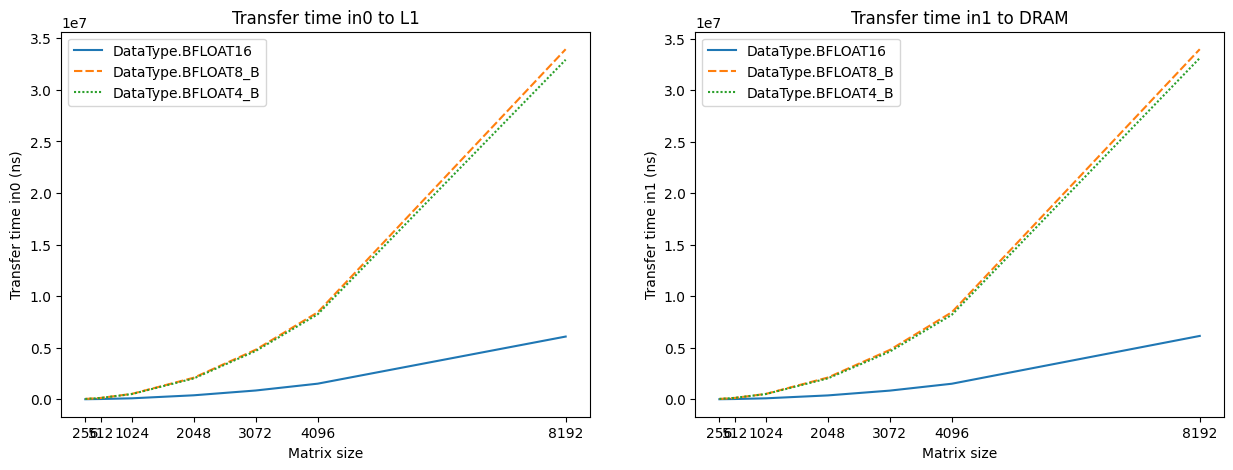

In [382]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
plot = sns.lineplot(df_ol0, ax=ax[0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Transfer time in0 (ns)")
plot.set_title("Transfer time in0 to L1")

plot = sns.lineplot(df_ol1, ax=ax[1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Transfer time in1 (ns)")

plot.set_title("Transfer time in1 to DRAM")

plt.show()


In [302]:
data0 = dict()
data1 = dict()

c_name = 'dtype'
c_list = df[c_name].unique()

for c in c_list:
    data0[c] = list()
    data1[c] = list()

    for m in unq_m:
        val0 = df.loc[(df['m'] == m) & (df[c_name] == c)]['transfer_time_in0'].values.mean()
        val1 = df.loc[(df['m'] == m) & (df[c_name] == c)]['transfer_time_in1'].values.mean()
        data0[c].append(val0)
        data1[c].append(val1)

df_ol0 = pd.DataFrame.from_dict(data0)
df_ol0.set_index(unq_m, inplace=True)

df_ol1 = pd.DataFrame.from_dict(data1)
df_ol1.set_index(unq_m, inplace=True)

In [303]:
df_ol0

,DataType.BFLOAT16,DataType.BFLOAT8_B,DataType.BFLOAT4_B
256,7583.620,3.599346e+04,34239.77
512,28441.310,1.332278e+05,128617.76
1024,96065.640,5.237969e+05,507962.70
2048,388345.240,2.091453e+06,2021286.96
3072,853449.110,4.806396e+06,4687785.86
4096,1515385.150,8.433535e+06,8243986.61
8192,6081923.845,3.393476e+07,32916332.48


In [304]:
df_ol1

,DataType.BFLOAT16,DataType.BFLOAT8_B,DataType.BFLOAT4_B
256,6328.585,3.457606e+04,33479.69
512,26157.500,1.322662e+05,139009.24
1024,94388.605,5.233343e+05,508762.84
2048,376697.420,2.111792e+06,2029073.00
3072,842471.600,4.793228e+06,4633220.20
4096,1510665.060,8.452292e+06,8205118.18
8192,6151861.550,3.399041e+07,33132028.82


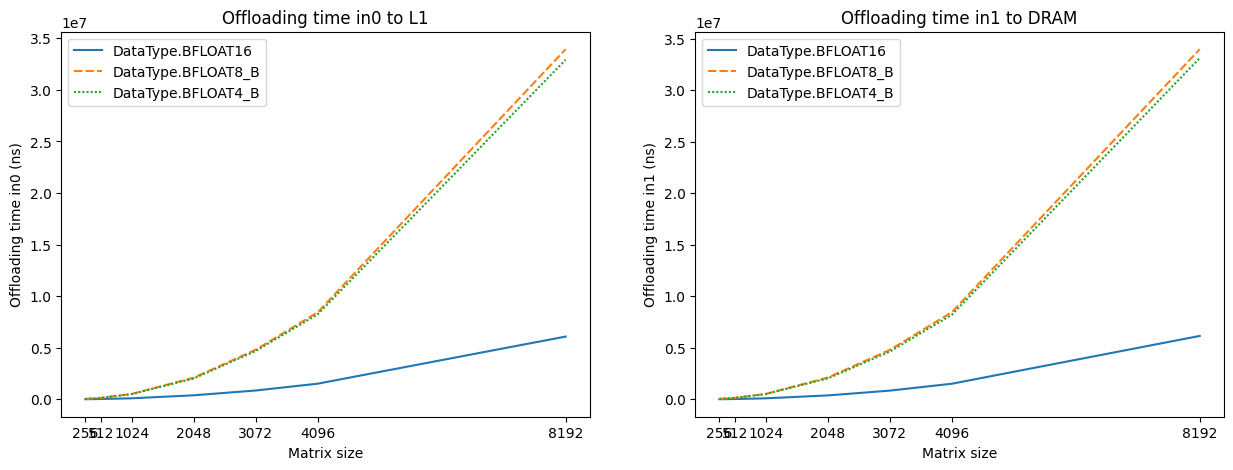

In [305]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
plot = sns.lineplot(df_ol0, ax=ax[0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Transfer time in0 (ns)")
plot.set_title("Transfer time in0 to L1")

plot = sns.lineplot(df_ol1, ax=ax[1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Transfer time in1 (ns)")

plot.set_title("Transfer time in1 to DRAM")

plt.show()


### Calculate Mb/s transfer

In [399]:
(16 * elements)/1e9

Index([0.001048576, 0.004194304, 0.016777216, 0.067108864, 0.150994944,
       0.268435456, 1.073741824],
      dtype='float64')

In [306]:
df_ol_norm_b = pd.DataFrame()
elements = df_ol0.index * df_ol0.index

df_ol_norm_b['DataType.BFLOAT16'] = (16 * elements) / df_ol0['DataType.BFLOAT16'] 
df_ol_norm_b['DataType.BFLOAT8_B'] = (8 * elements + (elements)//16) / df_ol0['DataType.BFLOAT8_B']
df_ol_norm_b['DataType.BFLOAT4_B'] = (4 * elements + (elements)//16) / df_ol0['DataType.BFLOAT4_B']

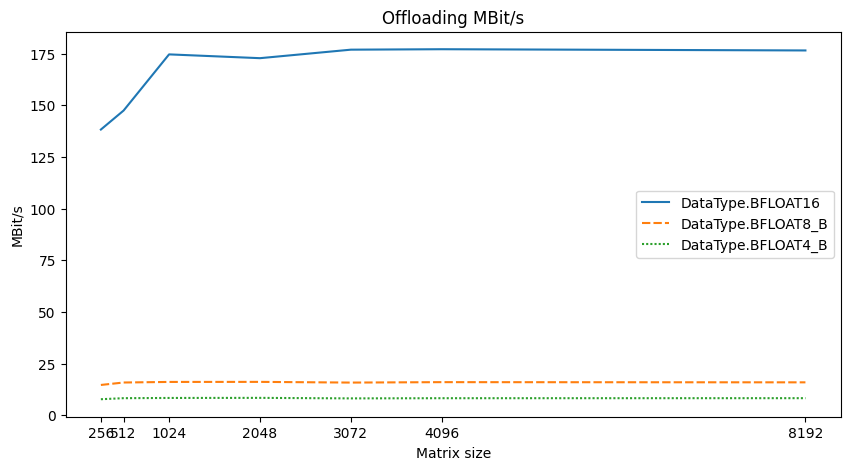

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plot = sns.lineplot(df_ol_norm_b, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("MBit/s")
plot.set_title("transfer MBit/s")

plt.show()

### Normalize by bytes

In [308]:
df_ol_norm_b = pd.DataFrame()
df_ol_norm_b['DataType.BFLOAT16'] = df_ol0['DataType.BFLOAT16'] / (16 * elements)
df_ol_norm_b['DataType.BFLOAT8_B'] = df_ol0['DataType.BFLOAT8_B'] / (8 * elements + (elements)//16)
df_ol_norm_b['DataType.BFLOAT4_B'] = df_ol0['DataType.BFLOAT4_B'] / (4 * elements + (elements)//16)

In [309]:
df_ol_norm_b

,DataType.BFLOAT16,DataType.BFLOAT8_B,DataType.BFLOAT4_B
256,0.007232,0.068120,0.128605
512,0.006781,0.063036,0.120772
1024,0.005726,0.061957,0.119245
2048,0.005787,0.061847,0.118625
3072,0.005652,0.063169,0.122273
4096,0.005645,0.062348,0.120955
8192,0.005664,0.062718,0.120736


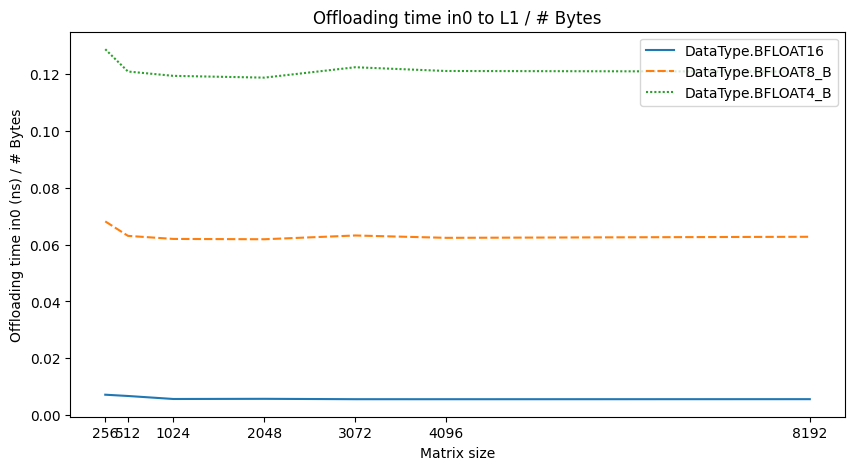

In [310]:
fig, ax = plt.subplots(figsize=(10,5))
plot = sns.lineplot(df_ol_norm_b, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("transfer time in0 (ns) / # Bytes")
plot.set_title("transfer time in0 to L1 / # Bytes")

plt.show()

## Inference time

In [325]:
data = dict()

d_name = "inference_time_avg"

c_name = 'conf'
c_list = df[c_name].unique()

for c in c_list:
    data[c] = list()

    for m in unq_m:
        val0 = df.loc[(df['m'] == m) & (df[c_name] == c)][d_name].values[0]
        data[c].append(val0)


df_inf_conf= pd.DataFrame.from_dict(data)
df_inf_conf.set_index(unq_m, inplace=True)

In [383]:
cpu_calc

[3.3593177795410156,
 3.7381649017333984,
 3.805875778198242,
 6.942272186279297,
 8.008003234863281,
 9.525299072265625,
 17.13252067565918]

In [326]:
df_inf_conf

,f16_m2,f16_m4,f8b_m2,f8b_m0,f4b_m0
256,257.33,243.64,246.66,247.37,246.83
512,244.19,244.95,252.00,251.83,246.46
1024,243.73,248.80,250.38,250.54,259.20
2048,399.80,674.03,359.18,250.40,247.24
3072,1990.74,2877.01,1510.97,989.06,820.91
4096,4383.52,6364.27,3385.24,2233.29,1773.07
8192,29435.45,45940.03,24773.45,15113.17,12931.69


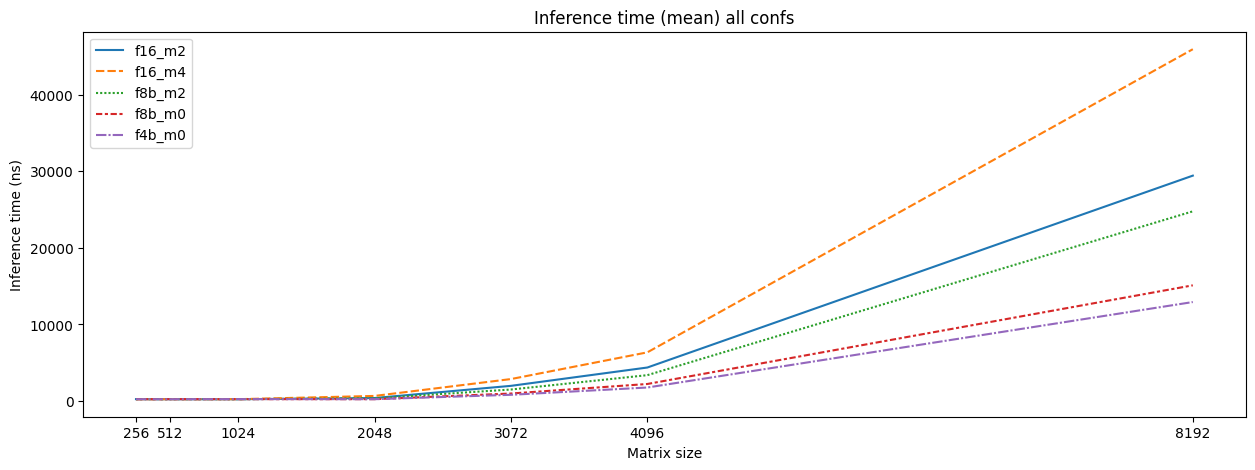

In [330]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_inf_conf, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (ns)")
plot.set_title("Inference time (mean) all confs")

plt.show()

In [315]:
data = dict()

d_name = "inference_time_avg"

c_name = 'dtype'
c_list = df[c_name].unique()

for c in c_list:
    data[c] = list()

    for m in unq_m:
        val0 = df.loc[(df['m'] == m) & (df[c_name] == c)][d_name].values.mean()
        data[c].append(val0)

df_inf_dtype = pd.DataFrame.from_dict(data)
df_inf_dtype.set_index(unq_m, inplace=True)
df_inf_dtype

,DataType.BFLOAT16,DataType.BFLOAT8_B,DataType.BFLOAT4_B
256,250.485,247.015,246.83
512,244.570,251.915,246.46
1024,246.265,250.460,259.20
2048,536.915,304.790,247.24
3072,2433.875,1250.015,820.91
4096,5373.895,2809.265,1773.07
8192,37687.740,19943.310,12931.69


In [316]:
c_name = 'math_fidelity'

data = dict()
c_list = df[c_name].unique()
for c in c_list:
    data[c] = list()

    for m in unq_m:
        val0 = df.loc[(df['m'] == m) & (df[c_name] == c)][d_name].values.mean()
        data[c].append(val0)

df_inf_math_fidelity = pd.DataFrame.from_dict(data)
df_inf_math_fidelity.set_index(unq_m, inplace=True)
df_inf_math_fidelity

,MathFidelity.HiFi2,MathFidelity.HiFi4,MathFidelity.LoFi
256,251.995,243.64,247.100
512,248.095,244.95,249.145
1024,247.055,248.80,254.870
2048,379.490,674.03,248.820
3072,1750.855,2877.01,904.985
4096,3884.380,6364.27,2003.180
8192,27104.450,45940.03,14022.430


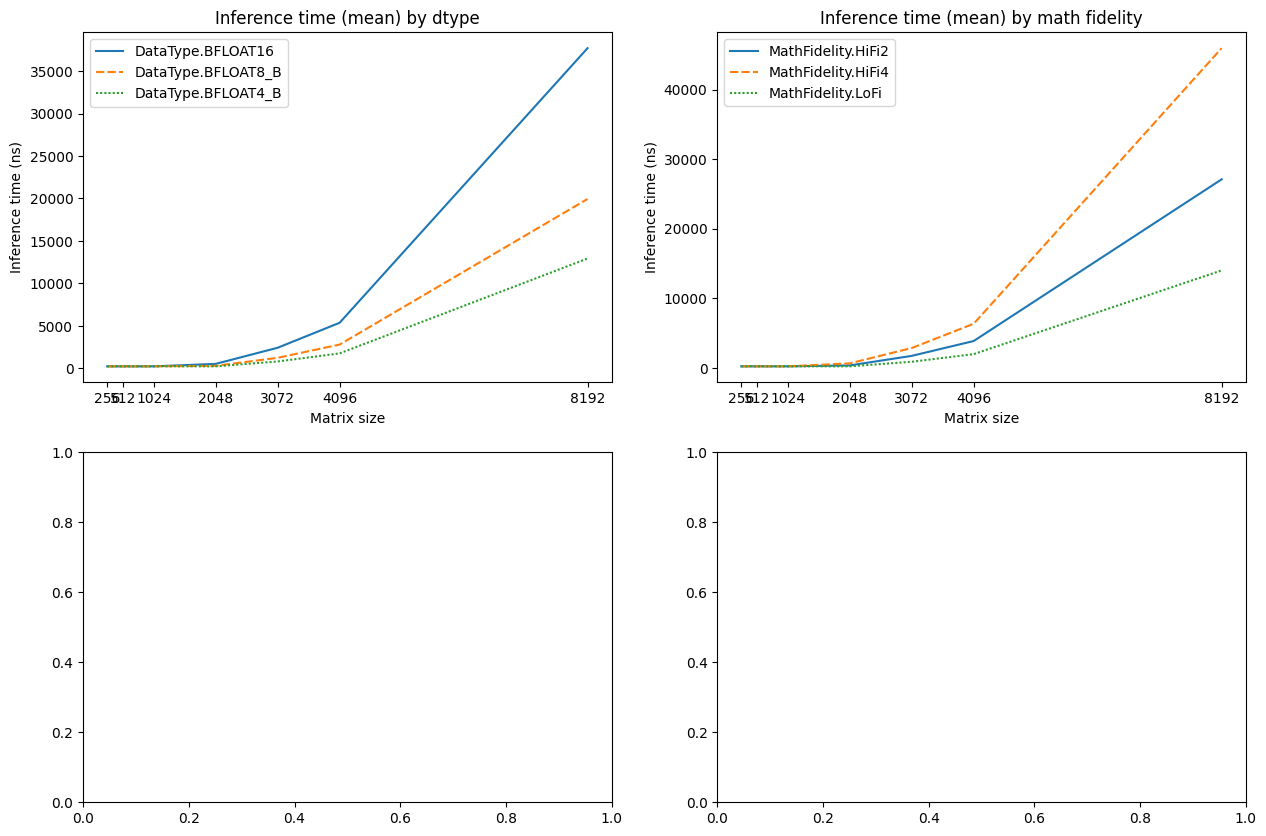

In [322]:
fig, ax = plt.subplots(2,2, figsize=(15,10))

plot = sns.lineplot(df_inf_dtype, ax=ax[0][0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (ns)")
plot.set_title("Inference time (mean) by dtype")

plot = sns.lineplot(df_inf_math_fidelity, ax=ax[0][1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (ns)")
plot.set_title("Inference time (mean) by math fidelity")

plt.show()
